# Test CAMB

In [1]:
import sys, platform, os
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import root
from scipy.interpolate import interp1d

sys.path.insert(0, os.path.join(os.path.abspath('.'), 'CAMB'))
import camb

Text(0.5, 1.0, 'ABC123 vs $\\mathrm{ABC123}^{123}$')

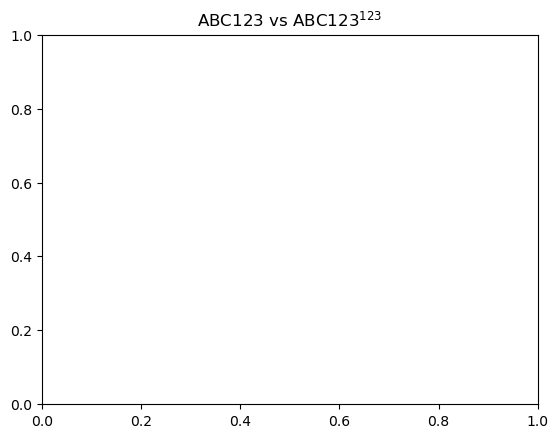

In [5]:
sns.set_palette("colorblind")
colors=sns.color_palette("colorblind")
plt.rcParams['text.usetex'] = False


matplotlib.rcParams['font.family'] = 'sans-serif'
#matplotlib.rcParams['mathtext.sans-serif'] = 'Tahoma'
matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')


In [6]:
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.4 installed at /Users/edoardo/AstroCosmoComputational/Students/MaraglianoEdo/Lession9/CAMB/camb


In [7]:
#Set up a new set of parameters for CAMB
#The defaults give one massive neutrino and helium set using BBN consistency
pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06,  
                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)

pars2 = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0.2, tau=0.06,  
                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)

In [8]:
#calculate results for these parameters
results = camb.get_results(pars)

#calculate results for these parameters
results2 = camb.get_results(pars2)

## Background cosmology

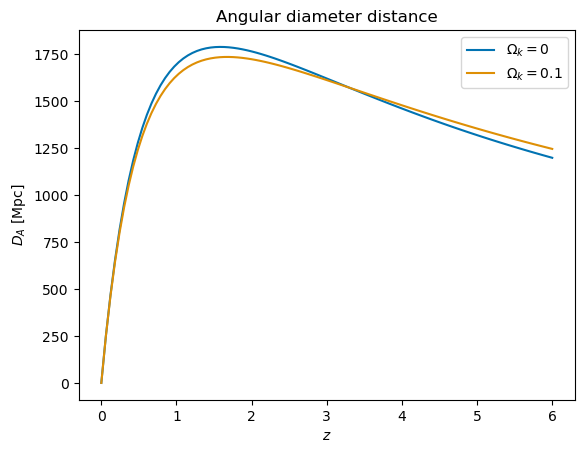

In [9]:
z = np.linspace(0,6,100)
DA = results.angular_diameter_distance(z)
DA2 = results2.angular_diameter_distance(z)
plt.plot(z, DA,label='$\Omega_k=0$')
plt.plot(z, DA2, label='$\Omega_k=0.1$')
plt.xlabel('$z$')
plt.ylabel(r'$D_A \ [\rm{Mpc}]$')
plt.title('Angular diameter distance')
plt.legend()
plt.show()

In [10]:
a= np.logspace(-6,0,1000)
densities = results.get_background_densities(a)
densities2 = results2.get_background_densities(a)

In [11]:
densities.keys()

dict_keys(['tot', 'K', 'cdm', 'baryon', 'photon', 'neutrino', 'nu', 'de'])

Text(0, 0.5, '$\\Omega_i$')

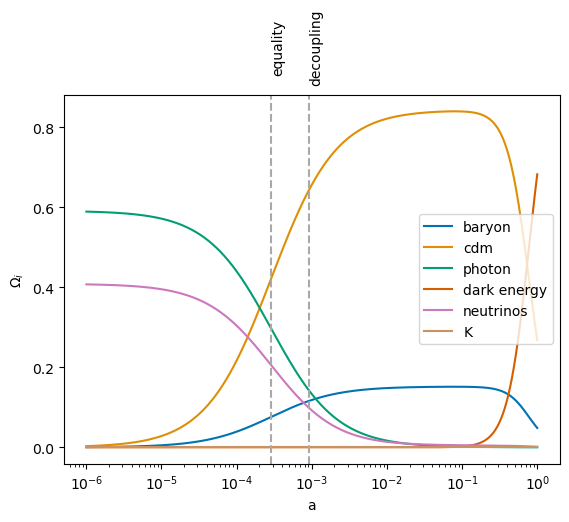

In [12]:
plt.plot(a, densities['baryon']/densities['tot'], label='baryon')
plt.plot(a, densities['cdm']/densities['tot'], label='cdm')
plt.plot(a, densities['photon']/densities['tot'], label='photon')
plt.plot(a, densities['de']/densities['tot'], label='dark energy')
plt.plot(a, (densities['neutrino']+densities['nu'])/densities['tot'], label='neutrinos')
plt.plot(a, densities['K']/densities['tot'], label='K')
plt.axvline(1./(1+results.get_derived_params()['zeq']), color='darkgrey', linestyle='--')
plt.axvline(1./(1+results.get_derived_params()['zstar']), color='darkgrey', linestyle='--')
plt.text(1./(1+results.get_derived_params()['zeq']), 1, 'equality', rotation=90, verticalalignment='center')
plt.text(1./(1+results.get_derived_params()['zstar']), 1, 'decoupling', rotation=90, verticalalignment='center')
plt.legend()
plt.xscale('log')
plt.xlabel('a')
plt.ylabel(r'$\Omega_i$')

## Thermodynamics

In [13]:
z = 1./a - 1.
background = results.get_background_redshift_evolution(z)

In [14]:
pars2 = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0., tau=0.01,  
                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)

results2 = camb.get_results(pars2)
background2 = results2.get_background_redshift_evolution(z)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'ionization history')

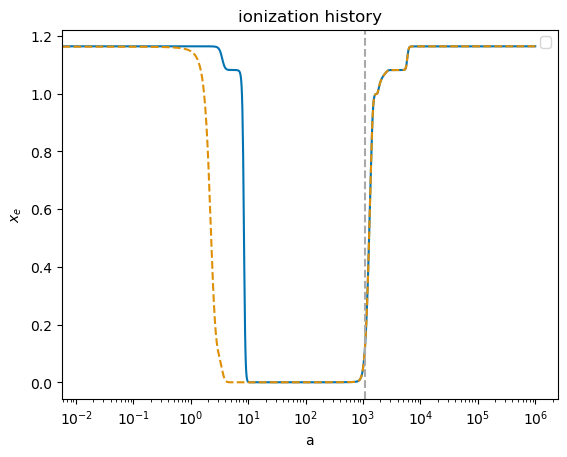

In [15]:
plt.plot(z, background['x_e'])
plt.plot(z, background2['x_e'], linestyle='--')
plt.axvline(results.get_derived_params()['zstar'], color='darkgrey', linestyle='--')
plt.legend()
plt.xscale('log')
plt.xlabel('a')
plt.ylabel(r'$x_e$')
plt.title('ionization history')

note that 
+ it starts bigger than 1 (due to helium fraction)
+ jumps at z=z_rec (see 'How exactly the universe became neutral' paper)
+ if $\tau$ gets lower, optical thickness is reduced and the universe reionizes later

## Perturbations

reminder:
+ einstein are not dynamical, boltzmann are
+ fluid equation for matter and baryons
+ hyerarchies for radiation, neutrinos, DE

In [16]:
vars=['k/h', 'a', 'H', 'Weyl','delta_baryon','delta_cdm', 'delta_photon']

In [17]:
##k modes are evolved independently: you need to specify which mode you want
k1=0.15
time_evolution = results.get_redshift_evolution(k1, z, vars)

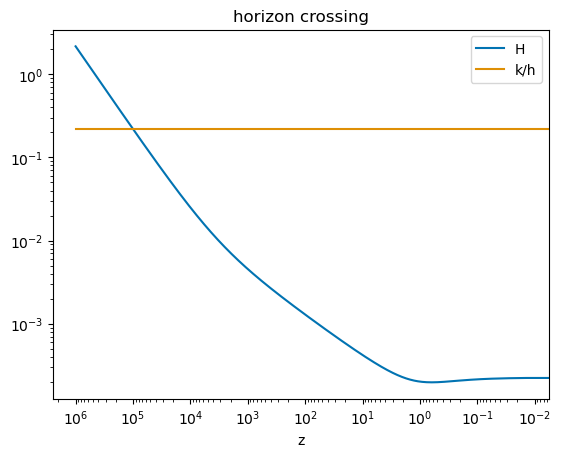

In [18]:
plt.loglog(z, time_evolution[:,vars.index('H')], label='H')
plt.loglog(z, time_evolution[:,vars.index('k/h')], label='k/h')
plt.legend()
plt.title('horizon crossing')
plt.xlabel('z')
plt.gca().invert_xaxis()

In [19]:
f = interp1d(a, 67.5/100*time_evolution[:,vars.index('k/h')]-time_evolution[:,vars.index('H')] )
crossing = root(f, 1.e-5)
a_crossing = crossing.x
z_crossing = 1./a_crossing-1
print(a_crossing)

a_star = 1./(1+results.get_derived_params()['zstar'])
z_star = results.get_derived_params()['zstar']

a_eq = 1./(1+results.get_derived_params()['zeq'])
z_eq = results.get_derived_params()['zeq']

[1.47428456e-05]


In [20]:
vars=['k/h', 'a', 'H', 'Weyl','delta_baryon','delta_cdm', 'delta_photon']

Text(0, 0.5, '$\\delta$')

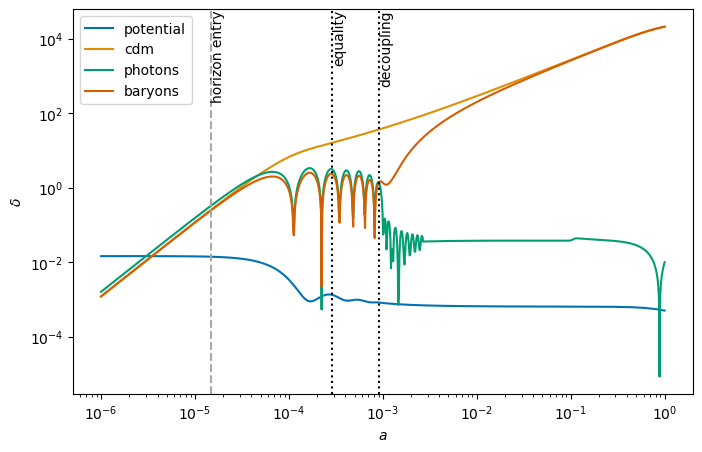

In [21]:

plt.figure(figsize=(8,5))

plt.loglog(a, np.abs(time_evolution[:,vars.index('Weyl')]), label='potential')
plt.loglog(a, np.abs(time_evolution[:,vars.index('delta_cdm')]), label='cdm')
plt.loglog(a, np.abs(time_evolution[:,vars.index('delta_photon')]), label='photons')
plt.loglog(a, np.abs(time_evolution[:,vars.index('delta_baryon')]), label='baryons')
plt.axvline(a_crossing, linestyle='--', color='darkgrey')
plt.axvline(a_star, linestyle=':', color='black')
plt.axvline(a_eq, linestyle=':', color='black')
plt.text(a_crossing, np.max(plt.ylim()), 'horizon entry', rotation=90, verticalalignment='top', color='black')
plt.text(a_star, np.max(plt.ylim()), 'decoupling', rotation=90, verticalalignment='top', color='black')
plt.text(a_eq, np.max(plt.ylim()), 'equality', rotation=90, verticalalignment='top', color='black')
plt.legend()
#plt.title('Evolution of the perturbation, k/h = 0.1')
plt.xlabel('$a$')
plt.ylabel('$\delta$')




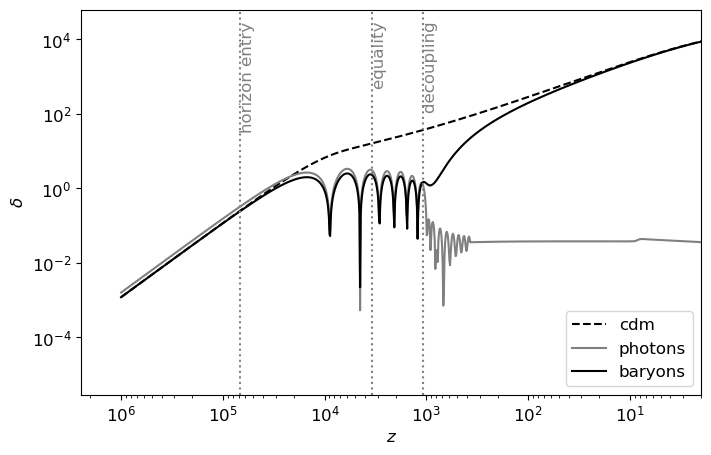

In [71]:
plt.figure(figsize=(8,5))

#plt.loglog(z, np.abs(time_evolution[:,vars.index('Weyl')]), label='potential')
plt.plot(z, np.abs(time_evolution[:,vars.index('delta_cdm')]), label='cdm', linestyle='--', color='k')
plt.plot(z, np.abs(time_evolution[:,vars.index('delta_photon')]), label='photons', color='grey')
plt.plot(z, np.abs(time_evolution[:,vars.index('delta_baryon')]), label='baryons', color='k')
plt.axvline(z_crossing, linestyle=':', color='grey')
plt.axvline(results.get_derived_params()['zstar'], linestyle=':', color='grey')
plt.axvline(results.get_derived_params()['zeq'], linestyle=':', color='grey')
plt.text(z_crossing, np.max(plt.ylim())+20000, 'horizon entry ', rotation=90, verticalalignment='top', color='grey', fontsize=12)
plt.text(results.get_derived_params()['zstar'], np.max(plt.ylim())+20000, 'decoupling ', rotation=90, verticalalignment='top', color='grey', fontsize=12)
plt.text(results.get_derived_params()['zeq'], np.max(plt.ylim())+20000, 'equality ', rotation=90, verticalalignment='top', color='grey', fontsize=12)
plt.legend(fontsize=12, loc='lower right')
#plt.title('Evolution of the perturbation, k/h = 0.1')
plt.xlabel('$z$', fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$\delta$', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(2)
plt.gca().invert_xaxis()
plt.savefig('perturbation_evolution.pdf')


### checking different modes

[0.00042251]


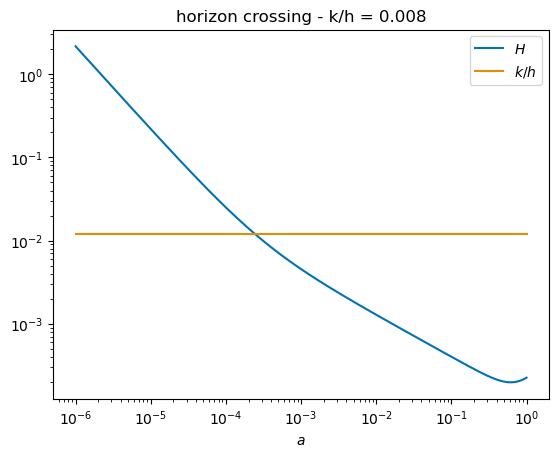

In [28]:
##k modes are evolved independently: you need to specify which mode you want
k2 = 0.008
time_evolution2 = results.get_redshift_evolution(k2, z, vars)

plt.loglog(a, time_evolution2[:,vars.index('H')], label='$H$')
plt.loglog(a, time_evolution2[:,vars.index('k/h')], label='$k/h$')
plt.legend()
plt.title(f'horizon crossing - k/h = {k2}')
plt.xlabel('$a$')

f = interp1d(a, 67.5/100*time_evolution2[:,vars.index('k/h')]-time_evolution2[:,vars.index('H')] )
crossing2 = root(f, 1.e-4)
a_crossing2 = crossing2.x
z_crossing2 = 1./a_crossing2-1
print(a_crossing2)

[0.00203552]


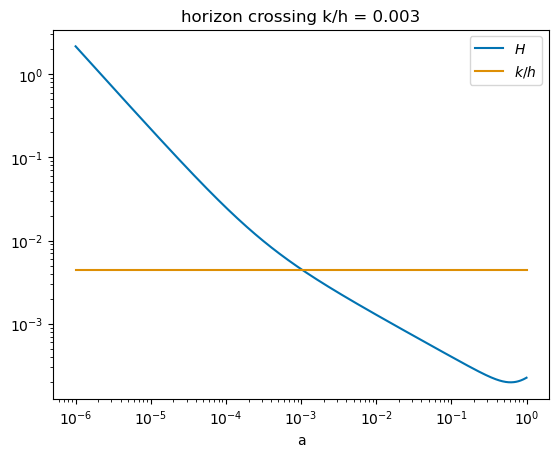

In [29]:
##k modes are evolved independently: you need to specify which mode you want
k3 = 0.003
time_evolution3 = results.get_redshift_evolution(k3, z, vars)

plt.loglog(a, time_evolution3[:,vars.index('H')], label='$H$')
plt.loglog(a, time_evolution3[:,vars.index('k/h')], label='$k/h$')
plt.legend()
plt.title(f'horizon crossing k/h = {k3}')
plt.xlabel('a')

f = interp1d(a, 67.5/100*time_evolution3[:,vars.index('k/h')]-time_evolution3[:,vars.index('H')] )
crossing3 = root(f, 1.e-3)
a_crossing3 = crossing3.x
z_crossing3 = 1./a_crossing3-1
print(a_crossing3)

Text(0, 0.5, '$\\delta_c$')

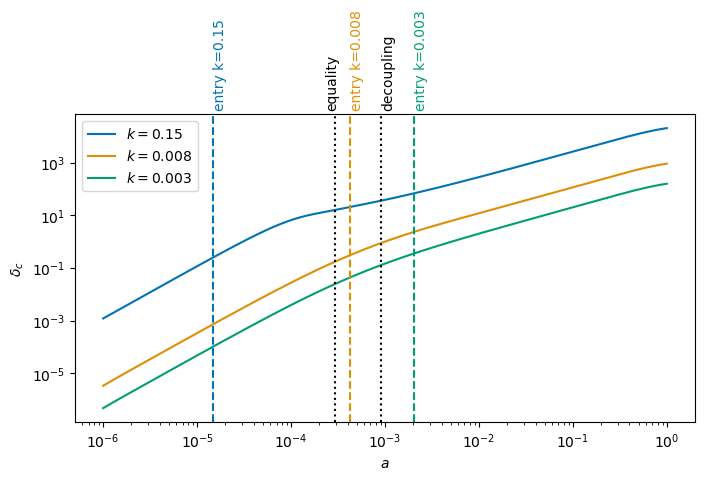

In [30]:
plt.figure(figsize=(8,4))


plt.loglog(a, np.abs(time_evolution[:,vars.index('delta_cdm')]), label=f'$k={k1}$')
plt.loglog(a, np.abs(time_evolution2[:,vars.index('delta_cdm')]), label=f'$k={k2}$')
plt.loglog(a, np.abs(time_evolution3[:,vars.index('delta_cdm')]), label=f'$k={k3}$')

plt.axvline(a_crossing, linestyle='--', color=colors[0])
plt.axvline(a_crossing2, linestyle='--', color=colors[1])
plt.axvline(a_crossing3, linestyle='--', color=colors[2])
plt.axvline(a_star, linestyle=':', color='black')
plt.axvline(a_eq, linestyle=':', color='black')

plt.text(a_crossing, np.min(plt.ylim())+100000, f'entry k={k1}', rotation=90, verticalalignment='bottom', color=colors[0])
plt.text(a_crossing2, np.min(plt.ylim())+100000, f'entry k={k2}', rotation=90, verticalalignment='bottom', color=colors[1])
plt.text(a_crossing3, np.min(plt.ylim())+100000, f'entry k={k3}', rotation=90, verticalalignment='bottom', color=colors[2])
plt.text(a_star, np.min(plt.ylim())+100000, 'decoupling', rotation=90, verticalalignment='bottom', color='black')
plt.text(0.8*a_eq, np.min(plt.ylim())+100000, 'equality', rotation=90, verticalalignment='bottom', color='black')

plt.legend()
plt.xlabel('$a$')
plt.ylabel('$\delta_c$')


Text(0, 0.5, '$\\Phi/\\Phi_i$')

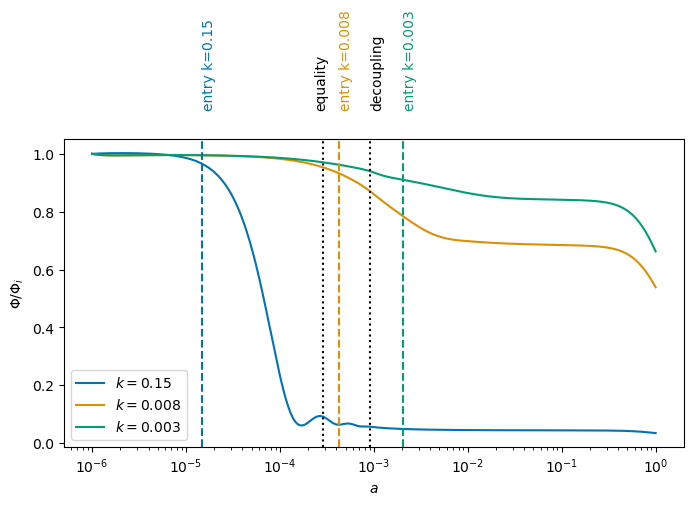

In [31]:
plt.figure(figsize=(8,4))

plt.plot(a, np.abs(time_evolution[:,vars.index('Weyl')]/time_evolution[0,vars.index('Weyl')]), label=f'$k={k1}$')
plt.plot(a, np.abs(time_evolution2[:,vars.index('Weyl')]/time_evolution2[0,vars.index('Weyl')]), label=f'$k={k2}$')
plt.plot(a, np.abs(time_evolution3[:,vars.index('Weyl')]/time_evolution3[0,vars.index('Weyl')]), label=f'$k={k3}$')

plt.xscale('log')
plt.axvline(a_crossing, linestyle='--', color=colors[0])
plt.axvline(a_crossing2, linestyle='--', color=colors[1])
plt.axvline(a_crossing3, linestyle='--', color=colors[2])
plt.axvline(a_star, linestyle=':', color='black')
plt.axvline(a_eq, linestyle=':', color='black')

plt.text(a_crossing, np.max(plt.ylim())+0.1, f'entry k={k1}', rotation=90, verticalalignment='bottom', color=colors[0])
plt.text(a_crossing2, np.max(plt.ylim())+0.1, f'entry k={k2}', rotation=90, verticalalignment='bottom', color=colors[1])
plt.text(a_crossing3, np.max(plt.ylim())+0.1, f'entry k={k3}', rotation=90, verticalalignment='bottom', color=colors[2])
plt.text(a_star, np.max(plt.ylim())+0.1, 'decoupling', rotation=90, verticalalignment='bottom', color='black')
plt.text(0.8*a_eq, np.max(plt.ylim())+0.1, 'equality', rotation=90, verticalalignment='bottom', color='black')

plt.legend()
plt.xlabel('$a$')
plt.ylabel('$\Phi/\Phi_i$')



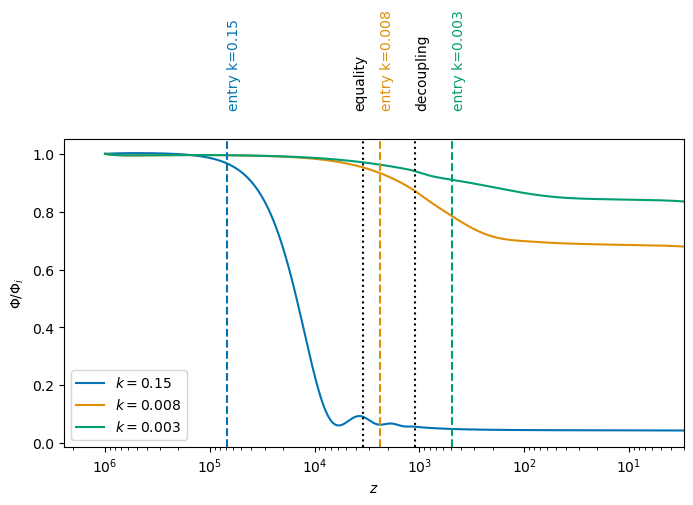

In [32]:
plt.figure(figsize=(8,4))

plt.plot(z, np.abs(time_evolution[:,vars.index('Weyl')]/time_evolution[0,vars.index('Weyl')]), label=f'$k={k1}$')
plt.plot(z, np.abs(time_evolution2[:,vars.index('Weyl')]/time_evolution2[0,vars.index('Weyl')]), label=f'$k={k2}$')
plt.plot(z, np.abs(time_evolution3[:,vars.index('Weyl')]/time_evolution3[0,vars.index('Weyl')]), label=f'$k={k3}$')

plt.xscale('log')
plt.axvline(z_crossing, linestyle='--', color=colors[0])
plt.axvline(z_crossing2, linestyle='--', color=colors[1])
plt.axvline(z_crossing3, linestyle='--', color=colors[2])
plt.axvline(z_star, linestyle=':', color='black')
plt.axvline(z_eq, linestyle=':', color='black')

plt.text(z_crossing, np.max(plt.ylim())+0.1, f'entry k={k1}', rotation=90, verticalalignment='bottom', color=colors[0])
plt.text(z_crossing2, np.max(plt.ylim())+0.1, f'entry k={k2}', rotation=90, verticalalignment='bottom', color=colors[1])
plt.text(z_crossing3, np.max(plt.ylim())+0.1, f'entry k={k3}', rotation=90, verticalalignment='bottom', color=colors[2])
plt.text(z_star, np.max(plt.ylim())+0.1, 'decoupling', rotation=90, verticalalignment='bottom', color='black')
plt.text(1.25*z_eq, np.max(plt.ylim())+0.1, 'equality', rotation=90, verticalalignment='bottom', color='black')
plt.xlim(3)
plt.legend()
plt.xlabel('$z$')
plt.ylabel('$\Phi/\Phi_i$')
plt.gca().invert_xaxis()


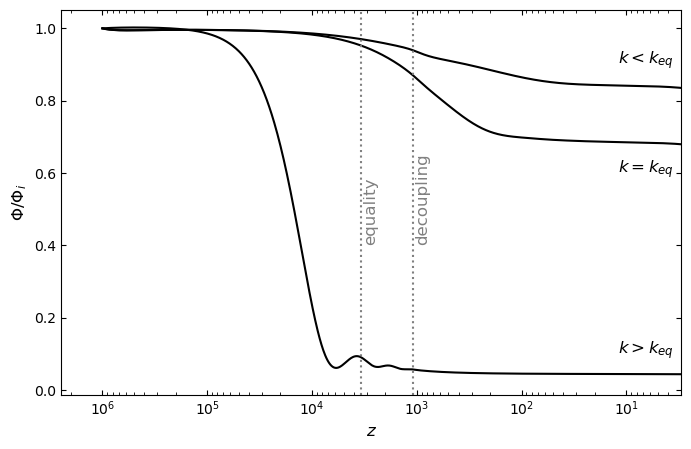

In [77]:
plt.figure(figsize=(8,5))

plt.plot(z, np.abs(time_evolution[:,vars.index('Weyl')]/time_evolution[0,vars.index('Weyl')]), label=f'$k={k1}$', color='k')
plt.plot(z, np.abs(time_evolution2[:,vars.index('Weyl')]/time_evolution2[0,vars.index('Weyl')]), label=f'$k={k2}$',color='k')
plt.plot(z, np.abs(time_evolution3[:,vars.index('Weyl')]/time_evolution3[0,vars.index('Weyl')]), label=f'$k={k3}$',color='k')

plt.xscale('log')
plt.axvline(z_star, linestyle=':', color='grey')
plt.axvline(z_eq, linestyle=':', color='grey')

plt.text(12, 0.9, r'$k<k_{eq}$', rotation=0, color='k', fontsize=12)
plt.text(12, 0.6, r'$k=k_{eq}$', rotation=0, color='k', fontsize=12)
plt.text(12, 0.1, r'$k>k_{eq}$', rotation=0, color='k', fontsize=12)
plt.text(0.95*z_star, 0.4, 'decoupling', rotation=90, verticalalignment='bottom', color='grey', fontsize=12)
plt.text(0.95*z_eq, 0.4, 'equality', rotation=90, verticalalignment='bottom', color='grey', fontsize=12)
plt.xlim(3)
#plt.legend(loc='lower left')
plt.xlabel('$z$', fontsize=12)
plt.ylabel('$\Phi/\Phi_i$', fontsize=12)

# Set ticks on all sides
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)

plt.gca().invert_xaxis()
plt.savefig('potential_evolution.pdf')

## Power Spectra